In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

# Importing 50_Startups DataSet

In [3]:
data=pd.read_csv(r'C:\Users\DELL\Desktop\Data Science\DS Assignment\Multi linear Regression\50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# EDA and Data Visualization

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data['R&D Spend']=data['R&D Spend'].astype('int')
data['Administration']=data['Administration'].astype('int')
data['Marketing Spend']=data['Marketing Spend'].astype('int')
data['Profit']=data['Profit'].astype('int')

In [7]:
dt=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS','State':'STS','Profit':'PFTS'},axis=1)

In [8]:
dt

,RDS,ADMS,MKTS,STS,PFTS
0,165349,136897,471784,New York,192261
1,162597,151377,443898,California,191792
2,153441,101145,407934,Florida,191050
3,144372,118671,383199,New York,182901
4,142107,91391,366168,Florida,166187
5,131876,99814,362861,New York,156991
6,134615,147198,127716,California,156122
7,130298,145530,323876,Florida,155752
8,120542,148718,311613,New York,152211
9,123334,108679,304981,California,149759


In [13]:
dt.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [15]:
dt.corr()

,RDS,ADMS,MKTS,PFTS
RDS,1.000000,0.241954,0.724248,0.972900
ADMS,0.241954,1.000000,-0.032156,0.200715
MKTS,0.724248,-0.032156,1.000000,0.747766
PFTS,0.972900,0.200715,0.747766,1.000000


In [16]:
import seaborn as sns
sns.pairplot(dt)

# Building Model

In [17]:
model=smf.ols("PFTS~RDS+ADMS+MKTS",data=dt).fit()

In [18]:
model.params

Intercept    50122.091528
RDS              0.805714
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [19]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626187
RDS          17.846291
ADMS         -0.525510
MKTS          1.655093
dtype: float64 
 Intercept    1.057490e-09
RDS          2.635461e-22
ADMS         6.017528e-01
MKTS         1.047136e-01
dtype: float64


In [20]:
(model.rsquared, model.rsquared_adj)

(0.9507456395777282, 0.9475333986806235)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PFTS   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        20:17:45   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.366      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MKTS           0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.839   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.443
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.587   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'

In [26]:
slr_a=smf.ols("PFTS~ADMS",data=dt).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    3.040049
 ADMS         1.419478
 dtype: float64,
 Intercept    0.003823
 ADMS         0.162222
 dtype: float64)

In [27]:
slr_a=smf.ols("PFTS~MKTS",data=dt).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    7.808316
 MKTS         7.802665
 dtype: float64,
 Intercept    4.295337e-10
 MKTS         4.380956e-10
 dtype: float64)

In [28]:
slr_a=smf.ols("PFTS~MKTS+ADMS",data=dt).fit()
slr_a.tvalues , slr_a.pvalues

(Intercept    1.142727
 MKTS         8.281051
 ADMS         2.467778
 dtype: float64,
 Intercept    2.589399e-01
 MKTS         9.726839e-11
 ADMS         1.729206e-02
 dtype: float64)

# Calculating VIF

In [29]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=dt).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=dt).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=dt).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326775


# Residual Analysis

In [30]:
residuals = model.resid
residuals

0      -259.960308
1      2635.955984
2      8903.282054
3      9204.778797
4     -5952.099123
5     -6588.922080
6     -1991.480623
7     -4269.072966
8       469.864723
9     -5124.805685
10    10612.232874
11     8686.206587
12    12447.701945
13     6819.495284
14   -16946.254140
15   -16317.517479
16    10076.795487
17    -4822.181492
18    -4747.976350
19     7141.586576
20     1835.136908
21    -6005.954651
22    -4354.436753
23    -1263.074960
24    -4810.781374
25     5167.022098
26    -4866.721592
27    -9399.493045
28     1622.567200
29     -790.409105
30      485.182849
31     -204.387707
32    -1573.453429
33    -1136.120079
34     7672.896660
35     5967.523193
36    15422.549866
37      330.327685
38    11532.096818
39    -2723.491876
40     3423.432362
41     2996.279655
42      878.424219
43     9591.687015
44      589.417378
45    17275.697479
46    -6675.803185
47    -3931.473216
48   -13498.234937
49   -33534.035542
dtype: float64

In [31]:
sns.distplot(residuals)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PFTS', ylabel='Count'>

In [32]:
residuals.mean()

1.2514647096395492e-11

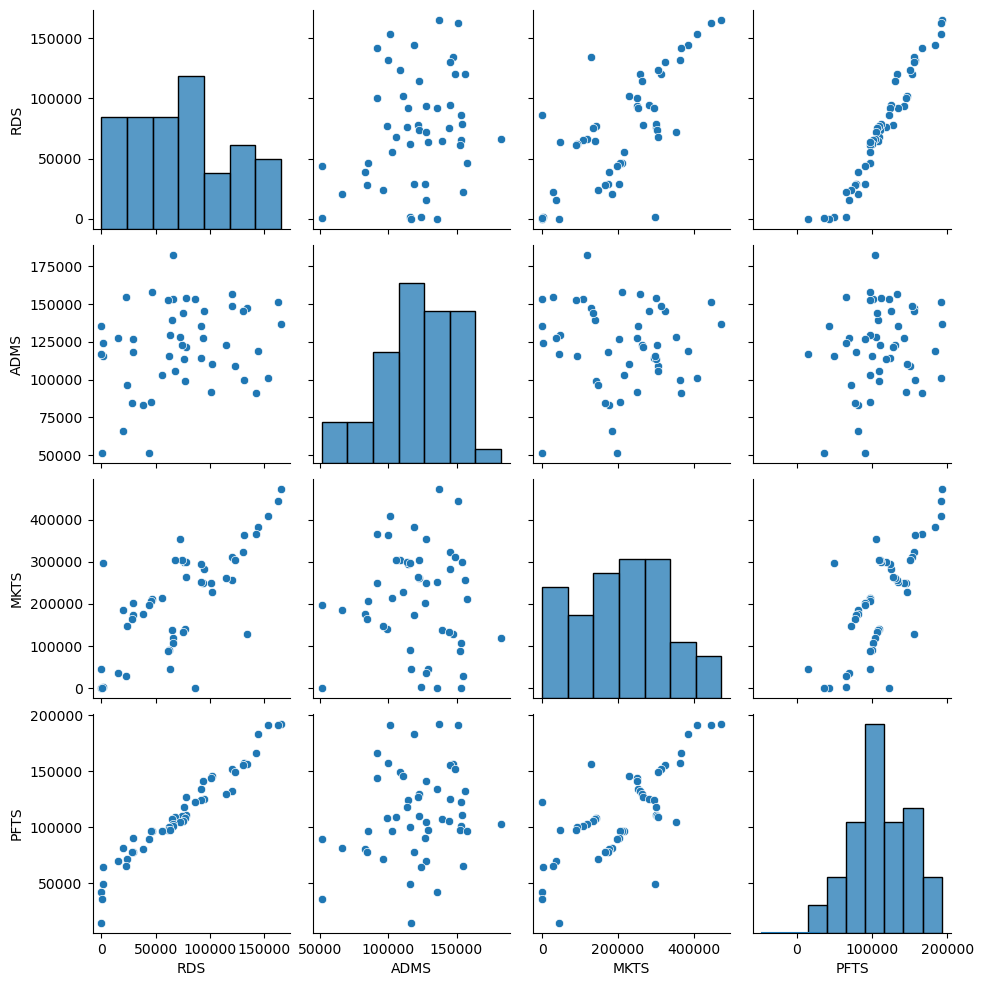

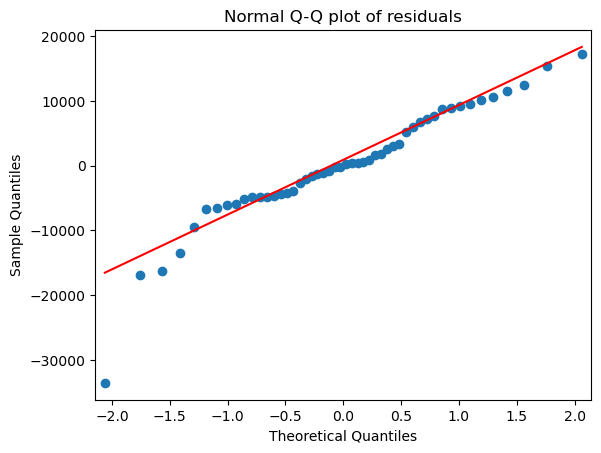

In [33]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid, line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [37]:
list(np.where(residuals <-30000))

[array([49], dtype=int64)]

In [40]:
predictions = model.predict(dt)
predictions

0     192520.960308
1     189156.044016
2     182146.717946
3     173696.221203
4     172139.099123
5     163579.922080
6     158113.480623
7     160021.072966
8     151741.135277
9     154883.805685
10    135508.767126
11    135572.793413
12    129137.298055
13    127487.504716
14    149548.254140
15    146234.517479
16    116915.204513
17    130192.181492
18    129013.976350
19    115634.413424
20    116638.863092
21    117318.954651
22    114706.436753
23    109996.074960
24    113362.781374
25    102236.977902
26    110599.721592
27    114407.493045
28    101659.432800
29    101794.409105
30     99451.817151
31     97687.387707
32     99000.453429
33     97914.120079
34     89039.103340
35     90511.476807
36     75285.450134
37     89618.672315
38     69696.903182
39     83728.491876
40     74815.567638
41     74801.720345
42     70619.575781
43     60166.312985
44     64610.582622
45     47650.302521
46     56165.803185
47     46490.473216
48     49171.234937
49     48215.035542


In [41]:
pd.DataFrame({'Actual': dt.PFTS,
             'Predicted': predictions,
             'Error': residuals})

,Actual,Predicted,Error
0,192261,192520.960308,-259.960308
1,191792,189156.044016,2635.955984
2,191050,182146.717946,8903.282054
3,182901,173696.221203,9204.778797
4,166187,172139.099123,-5952.099123
5,156991,163579.922080,-6588.922080
6,156122,158113.480623,-1991.480623
7,155752,160021.072966,-4269.072966
8,152211,151741.135277,469.864723
9,149759,154883.805685,-5124.805685


# Residual Plot for Homoscedasticity

In [42]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

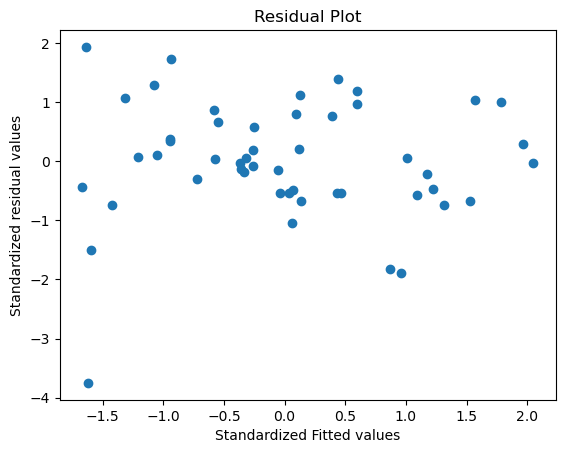

In [43]:
plt.scatter(get_standardized_values(predictions),
            get_standardized_values(residuals))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

eval_env: 1


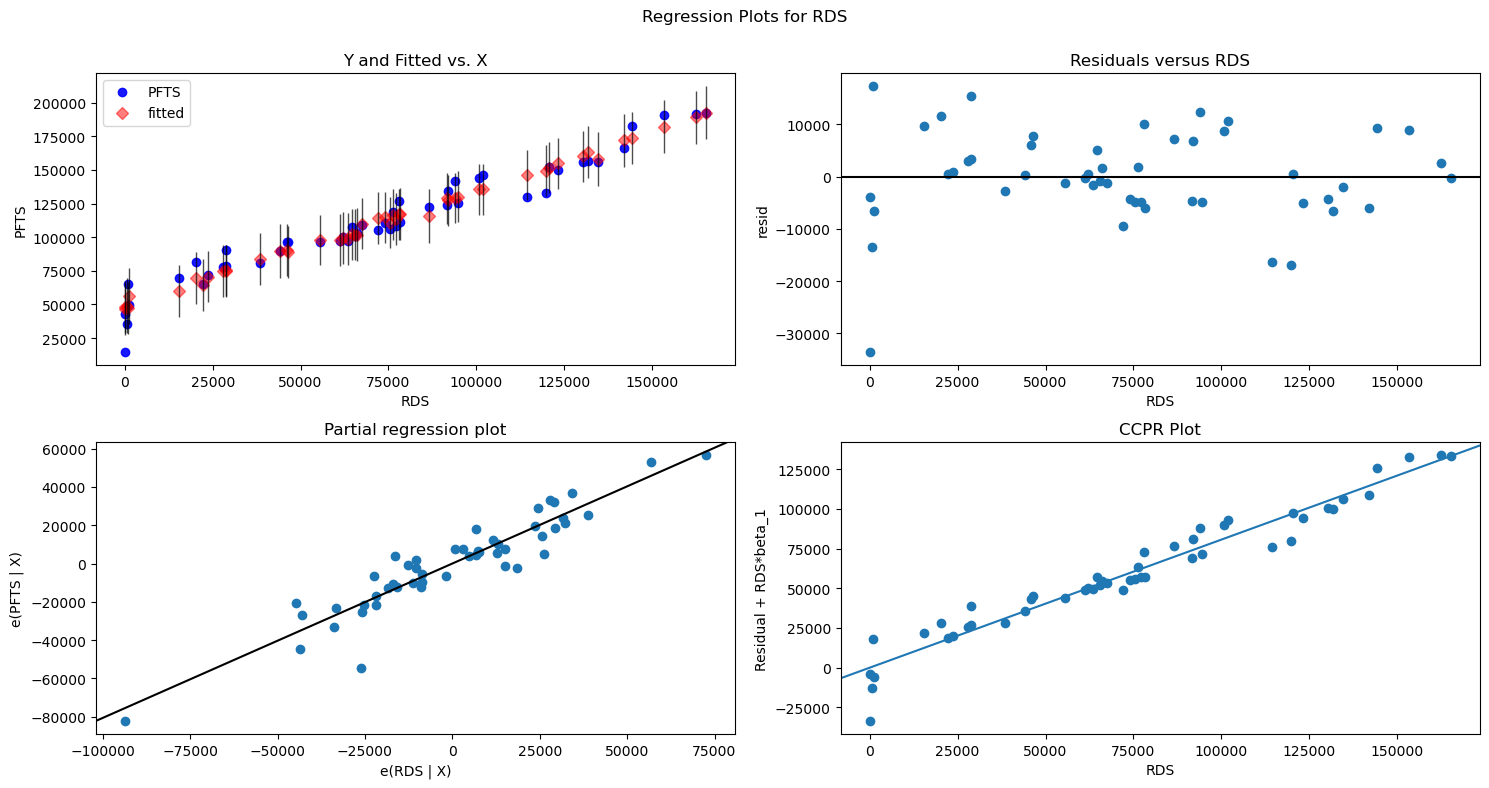

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


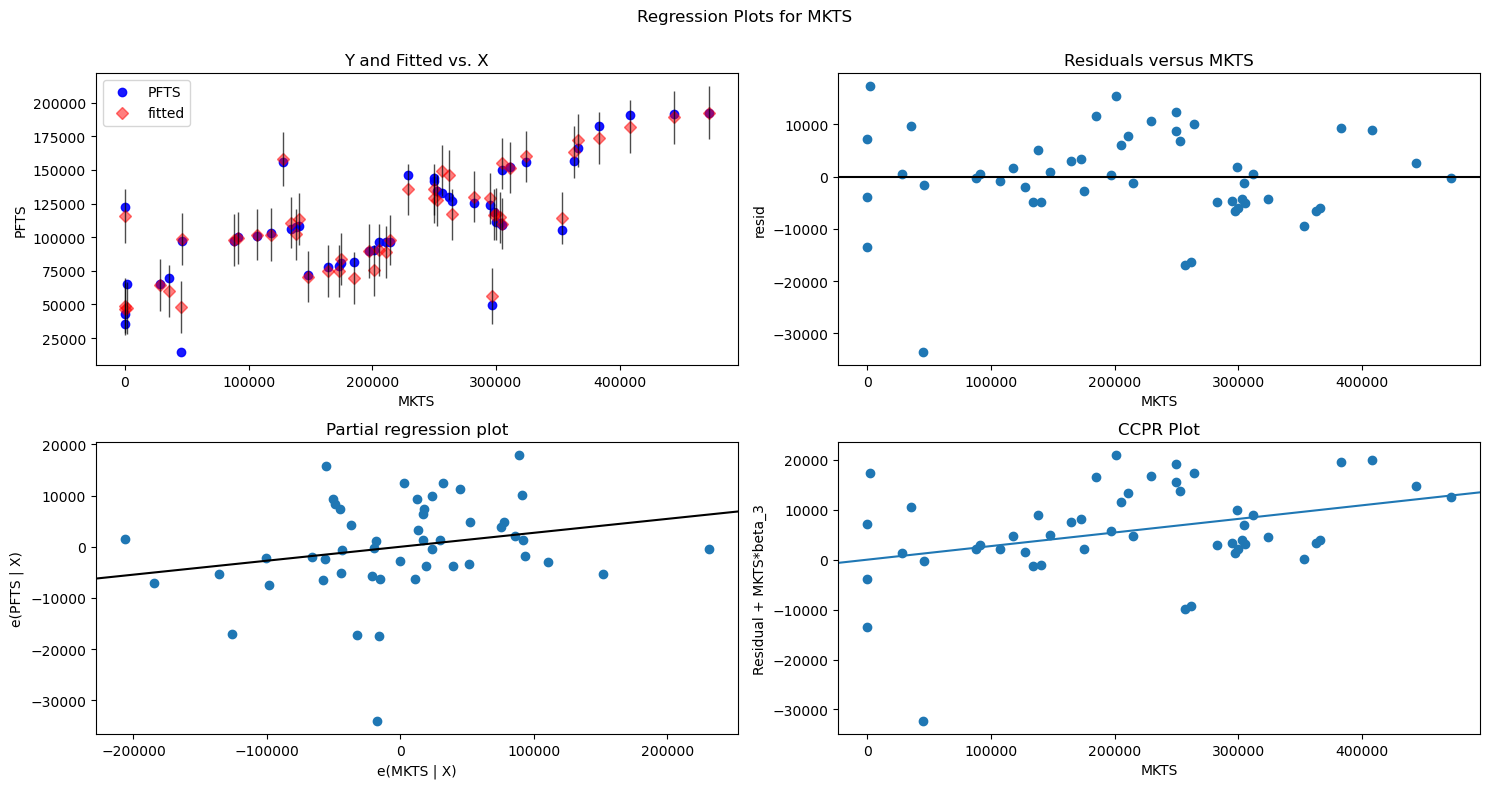

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

eval_env: 1


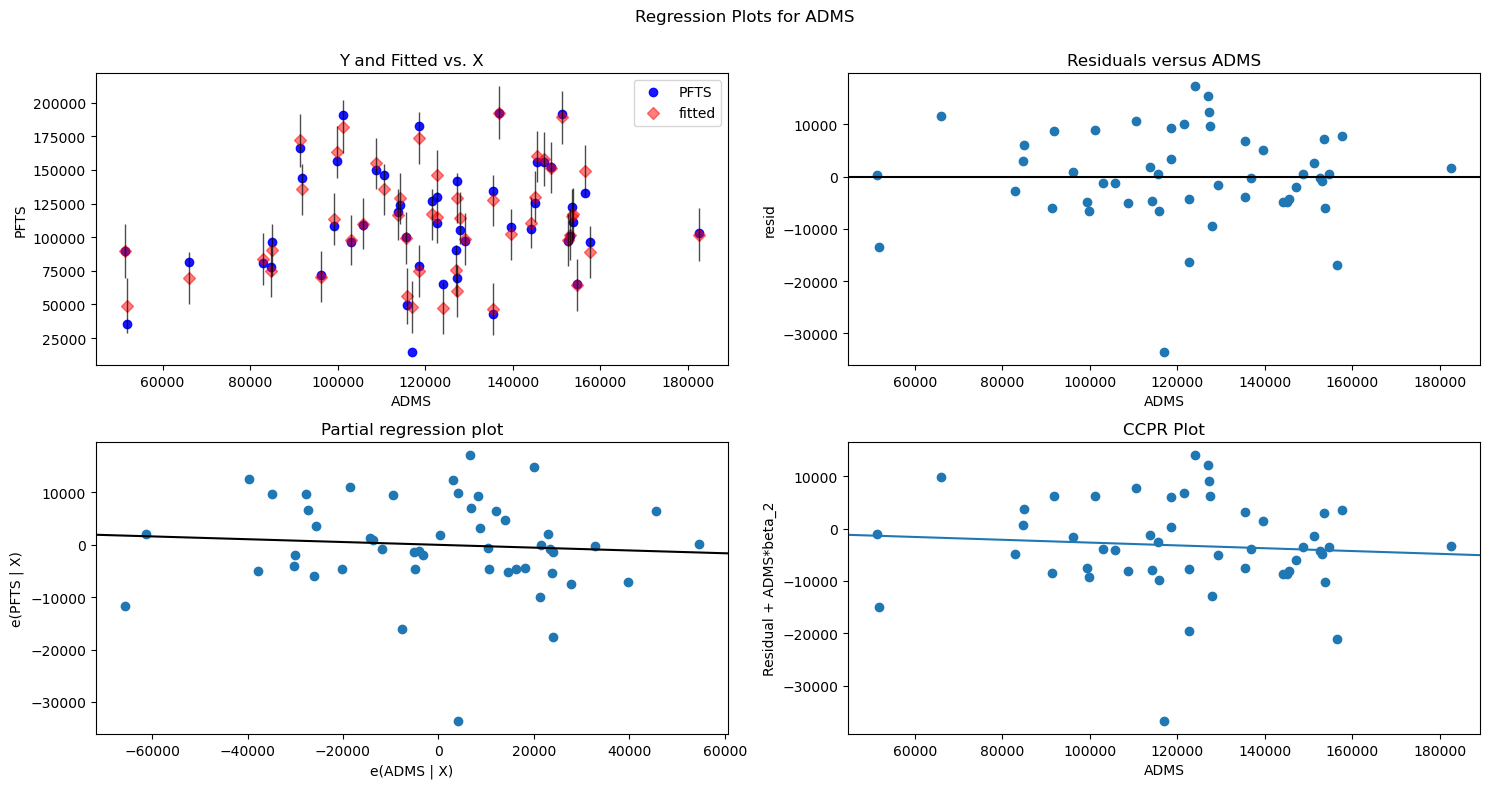

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

# Model Deletion Diagnostics
Detecting Influencers/Outliers
Cook’s Distance & Leverage method

In [47]:
(c,_)=model.get_influence().cooks_distance
c

array([3.23159263e-05, 3.27754160e-03, 3.23853268e-02, 2.17182073e-02,
       1.44859188e-02, 1.17131200e-02, 2.91735084e-03, 3.56568162e-03,
       4.03944127e-05, 4.86761666e-03, 1.51045096e-02, 1.63582695e-02,
       1.15520012e-02, 4.01440835e-03, 6.12954168e-02, 3.39986003e-02,
       8.33427892e-03, 3.30545574e-03, 2.16877570e-03, 4.07428552e-02,
       4.25498338e-04, 1.09826905e-02, 2.91727209e-03, 2.76223973e-04,
       5.04617737e-03, 3.00122563e-03, 3.41904055e-03, 2.98377367e-02,
       1.31624217e-03, 1.26014162e-04, 4.18441833e-05, 9.28248257e-06,
       7.08613940e-04, 1.28130090e-04, 2.09773969e-02, 6.69414484e-03,
       5.55356439e-02, 6.57926928e-05, 5.61598504e-02, 1.54304202e-03,
       1.84792817e-03, 1.97580698e-03, 1.36197652e-04, 2.05541584e-02,
       1.23341677e-04, 9.03258595e-02, 5.45358357e-02, 5.34041352e-03,
       1.90532847e-01, 2.88082450e-01])

<Figure size 2000x700 with 0 Axes>

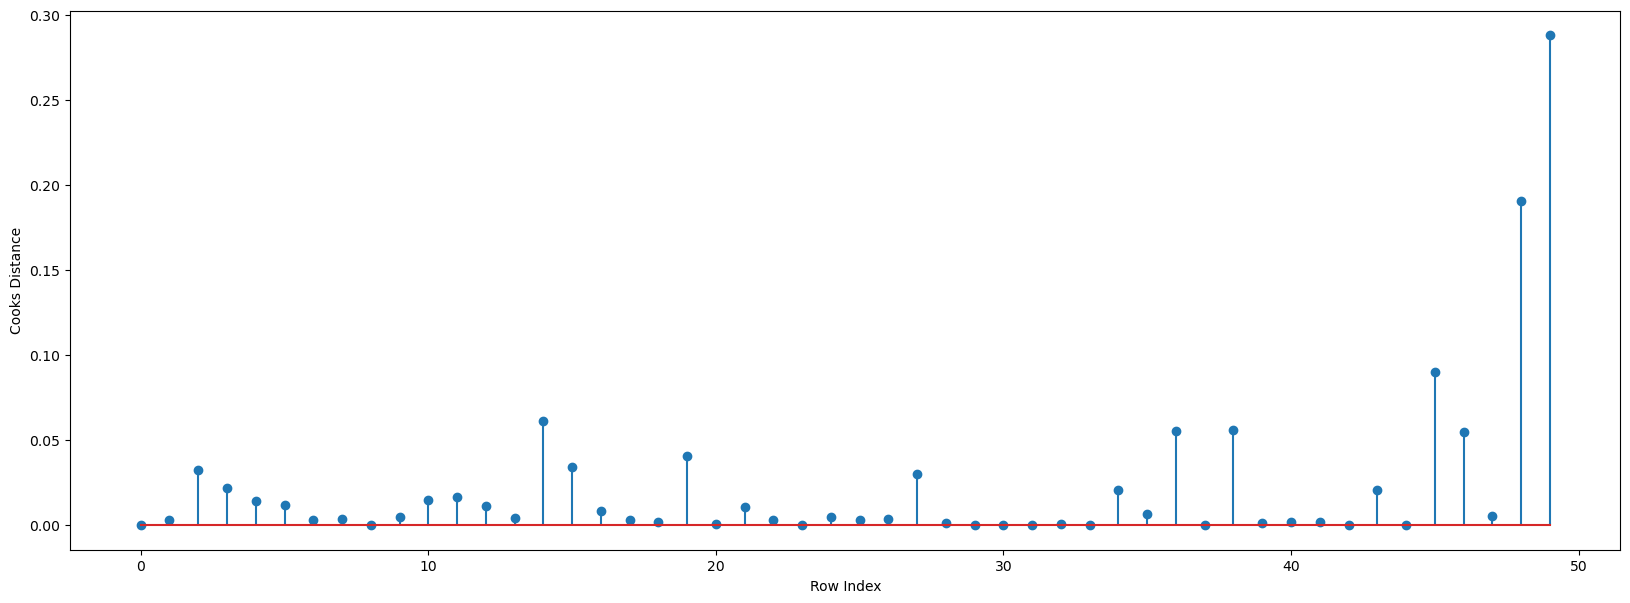

In [51]:
#Plot the influencers values using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(dt)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
np.argmax(c) , np.max(c)

(49, 0.2880824503026751)

<Figure size 2000x1000 with 0 Axes>

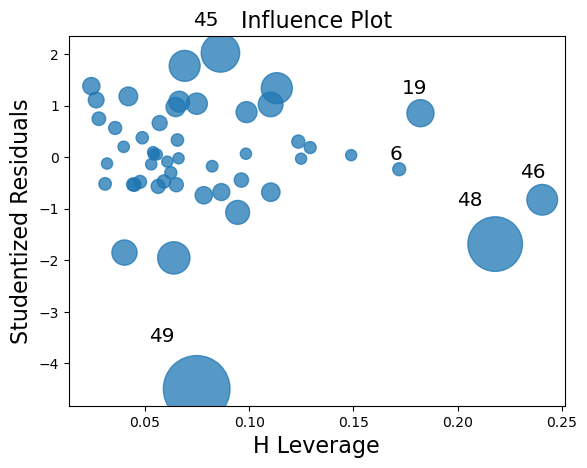

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
plt.figure(figsize = (20,10))
influence_plot(model)
plt.show()

In [54]:
k = dt.shape[1] #No. of features (columns)
n = dt.shape[0] #No. of observations (rows)

leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [56]:
dt.iloc[[49],:]

,RDS,ADMS,MKTS,STS,PFTS
49,0,116983,45173,California,14681


In [58]:
dt.head()

,RDS,ADMS,MKTS,STS,PFTS
0,165349,136897,471784,New York,192261
1,162597,151377,443898,California,191792
2,153441,101145,407934,Florida,191050
3,144372,118671,383199,New York,182901
4,142107,91391,366168,Florida,166187


# Improving the model

In [80]:
data2 = dt.drop(dt.index[[49]], axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,STS,PFTS
0,165349,136897,471784,New York,192261
1,162597,151377,443898,California,191792
2,153441,101145,407934,Florida,191050
3,144372,118671,383199,New York,182901
4,142107,91391,366168,Florida,166187
5,131876,99814,362861,New York,156991
6,134615,147198,127716,California,156122
7,130298,145530,323876,Florida,155752
8,120542,148718,311613,New York,152211
9,123334,108679,304981,California,149759


# Final Build Model

In [82]:
while np.max(c)>0.5 :
    model=smf.ols("PFTS~RDS+ADMS+MKTS",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("PFTS~RDS+ADMS+MKTS",data=data2).fit()
    final_model.rsquared , final_model.aic
    print("Model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613161672251679


# R^2 value

In [84]:
rsquare=pd.DataFrame({'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]})
rsquare

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
